<a href="https://colab.research.google.com/github/Angelespana19/CD_databits/blob/main/05_Estad%C3%ADstica_descriptiva.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


<div style="text-align: center; line-height: 0; padding-top: 9px;">
  <img src="https://storage.googleapis.com/datasets-academy/public-img/notebooks/headers/databits-header-notebook.png" alt="Databricks Learning" style="width: 100%;">
</div>

# <center>  Estadística Descriptiva  </center>

## Descripción
En esta lección se revisa los conceptos asociados a la estadística descriptiva implementando código Python.

## Contenido

* Medidas de Tendencia Central
* Medidas de Dispersión
* Medidas de Posición
* Medidas de Forma
* Distribución Normal
* Covarianza y correlación

## Requisitos previos

* Haber completado el curso:
  * Introducción a Python
  * Conocimientos básicos de programación
  * Navegador web: Chrome

<img alt="Caution" title="Caution" style="vertical-align: text-bottom; position: relative; height:1.3em; top:0.0em" src="https://storage.googleapis.com/datasets-academy/public-img/notebooks/icons/danger.png"/> **Disclaimer:** Este material ha sido preparado por el equipo de **handytec Academy®**. Se prohibe la publicación o reproducción de este material sin previa autorización de **handytec Academy®** - 2022 Todos los derechos reservados.

## Importar librerías y verificar versiones

In [2]:
import sys
import numpy as np
import pandas as pd
# Librería para medidas de posición y forma
import scipy
import scipy.stats as stats
# Librerías para visualización
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

In [ ]:
print('** Versiones Actuales | Requeridas **')
print('Python:\nVersion Actual:', sys.version, ' | Requerida >= 3.6')
print('NumPy:\nVersion Actual: {:10} | Requerida >= 1.16.2'.format(np.__version__))
print('Pandas:\nVersion Actual: {:10}| Requerida >= 1.0.1'.format(pd.__version__))
print('SciPy:\nVersion Actual: {:10}| Requerida >= 1.2.1'.format(scipy.__version__))
print('Matplotlib:\nVersion Actual: {:10} | Requerida >= 3.0.3'.format(matplotlib.__version__))
print('Seaborn:\nVersion Actual: {:10} |Requerida >= 0.9.0 '.format(sns.__version__))

** Versiones Actuales | Requeridas **
Python:
Version Actual: 3.7.14 (default, Sep  8 2022, 00:06:44) 
[GCC 7.5.0]  | Requerida >= 3.6
NumPy:
Version Actual: 1.21.6     | Requerida >= 1.16.2
Pandas:
Version Actual: 1.3.5     | Requerida >= 1.0.1
SciPy:
Version Actual: 1.7.3     | Requerida >= 1.2.1
Matplotlib:
Version Actual: 3.2.2      | Requerida >= 3.0.3
Seaborn:
Version Actual: 0.11.2     |Requerida >= 0.9.0 


## 1. Dataset de Trabajo

**Credit:** conjunto de datos simulados que contiene información sobre diez mil clientes de una entidad financiera

<a href='https://rdrr.io/cran/ISLR/man/Credit.html'>
  Documentación de las variables </a>

**Diccionario de datos**
* ID: Código de identificación del cliente
* Income: Ingresos del cliente en $10,000's
* Limit: Límite de crédito
* Rating: Puntaje crediticio
* Cards: Número de tarjetas de crédito
* Age: Edad en años
* Education: Número de años de educación
* Gender: Masculino (Male) o Femenino (Female)
* Student: Si el cliente es estudiantes (Yes) o no lo es (No)
* Married: Si el cliente está casado (Yes) o no está (No)
* Ethnicity: Africano (African), Americano (American), Asiático (Asian) y Caucásico (Caucasian)
* Balance: Promedio del saldo de la tarjeta de crédito en dólares

In [3]:
Credit       = pd.read_csv("https://storage.googleapis.com/datasets-academy/Credit.csv")
Credit["ID"] = Credit["ID"].astype(object)

In [ ]:
Credit.head(30)

,ID,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,3,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,4,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331
5,6,80.180,8047,569,4,77,10,Male,No,No,Caucasian,1151
6,7,20.996,3388,259,2,37,12,Female,No,No,African American,203
7,8,71.408,7114,512,2,87,9,Male,No,No,Asian,872
8,9,15.125,3300,266,5,66,13,Female,No,No,Caucasian,279
9,10,71.061,6819,491,3,41,19,Female,Yes,Yes,African American,1350


In [4]:
ingresos = Credit["Income"]
limite = Credit["Limit"]
type(ingresos)

pandas.core.series.Series

## 2. Medidas de Tendencia Central

Empezaremos visualizando la distribución de los ingresos por medio de un histograma. 

**Ejercicio:** Identificar las características de la distribución.

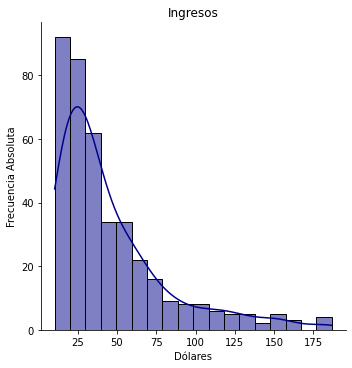

In [ ]:
sns.displot(ingresos, color="darkblue", kde=True) # kde genera una linea de tendencia 
plt.title("Ingresos")
plt.xlabel("Dólares")
plt.ylabel("Frecuencia Absoluta")
plt.show()

In [ ]:
# Medidas de tendencia central
media    = ingresos.mean()
mediana  = ingresos.median()
moda     = ingresos.mode()

print('Promedio: ', media, '\nMediana: ', mediana, '\nModa: ', moda[0])

Promedio:  45.218885 
Mediana:  33.1155 
Moda:  23.793


**¿Cuál de las medidas de tendencia central resumen correctamente a los ingresos?**

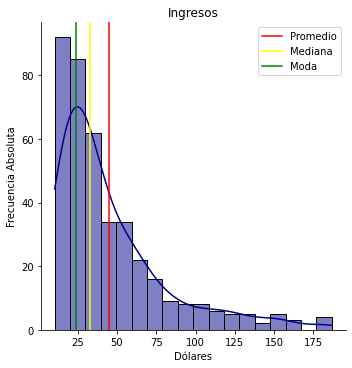

In [ ]:
sns.displot(ingresos, color ="darkblue", kde=True)
plt.title("Ingresos")
plt.xlabel("Dólares")
plt.ylabel("Frecuencia Absoluta")
plt.axvline(media, color='red', label='Promedio')
plt.axvline(mediana, color='yellow', label='Mediana')
plt.axvline(moda[0], color='green', label='Moda')
plt.legend()
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/databits/races.csv')

In [ ]:
df

,raceId,year,round,circuitId,name,date,time,url,fp1_date,fp1_time,fp2_date,fp2_time,fp3_date,fp3_time,quali_date,quali_time,sprint_date,sprint_time
0,1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
1,2,2009,2,2,Malaysian Grand Prix,2009-04-05,09:00:00,http://en.wikipedia.org/wiki/2009_Malaysian_Gr...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
2,3,2009,3,17,Chinese Grand Prix,2009-04-19,07:00:00,http://en.wikipedia.org/wiki/2009_Chinese_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
3,4,2009,4,3,Bahrain Grand Prix,2009-04-26,12:00:00,http://en.wikipedia.org/wiki/2009_Bahrain_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
4,5,2009,5,4,Spanish Grand Prix,2009-05-10,12:00:00,http://en.wikipedia.org/wiki/2009_Spanish_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1074,1092,2022,18,22,Japanese Grand Prix,2022-10-09,05:00:00,http://en.wikipedia.org/wiki/2022_Japanese_Gra...,2022-10-07,04:00:00,2022-10-07,08:00:00,2022-10-08,04:00:00,2022-10-08,07:00:00,\N,\N
1075,1093,2022,19,69,United States Grand Prix,2022-10-23,19:00:00,http://en.wikipedia.org/wiki/2022_United_State...,2022-10-21,19:00:00,2022-10-21,22:00:00,2022-10-22,19:00:00,2022-10-22,22:00:00,\N,\N
1076,1094,2022,20,32,Mexico City Grand Prix,2022-10-30,20:00:00,http://en.wikipedia.org/wiki/2022_Mexican_Gran...,2022-10-28,18:00:00,2022-10-28,21:00:00,2022-10-29,17:00:00,2022-10-29,20:00:00,\N,\N
1077,1095,2022,21,18,Brazilian Grand Prix,2022-11-13,18:00:00,http://en.wikipedia.org/wiki/2022_Brazilian_Gr...,2022-11-11,15:30:00,2022-11-12,15:30:00,\N,\N,2022-11-11,19:00:00,2022-11-12,19:30:00


>**Ejercicio 1:** Obtener el promedio, mediana y moda de la columna `Limit` del  DataFrame `Credit`

In [ ]:
#Su código aquí


### Solución

In [ ]:
print('Respuesta:')
limite = Credit['Limit']
print('Promedio:', limite.mean())
print('Mediana:', limite.median())
print('Moda:', limite.mode()[0])

Respuesta:
Promedio: 4735.6
Mediana: 4622.5
Moda: 855


## 3. Medidas de Dispersión

### Rango

In [ ]:
print("El ingreso mínimo es de:", ingresos.min())
print("El ingreso máximo es de:", ingresos.max())
print("El rango es igual a:", ingresos.max()-ingresos.min())

El ingreso mínimo es de: 10.354000000000001
El ingreso máximo es de: 186.63400000000001
El rango es igual a: 176.28


### Varianza y Desviación Estándar
* El argumento ```ddof``` hace referencia al denominador: ```N-ddof```
* ```ddof=0``` si trabajamos con la población
* ```ddof=1``` si trabajamos con la muestra

In [ ]:
print("La varianza en la población es igual a:", ingresos.var(ddof=0))
print("La desviación estandar en la población es igual a:", ingresos.std(ddof=0))

La varianza en la población es igual a: 1239.0533939567745
La desviación estandar en la población es igual a: 35.20019025455366


In [ ]:
print("La varianza en la muestra es igual a:", ingresos.var(ddof=1))
print("La desviación estandar en la muestra es igual a:", ingresos.std(ddof=1))

La varianza en la muestra es igual a: 1242.1587909341097
La desviación estandar en la muestra es igual a: 35.24427316507052


De forma predeterminada, el método ```var()``` calcula la varianza asumiendo que se trabaja con una muestra. Si no queremos utilizar el argumento ```ddof``` podemos corregir el valor por medio del siguiente truco algebráico.

In [ ]:
ingresos.var()*(len(ingresos)-1)/len(ingresos)

1239.0533939567745

>**Ejercicio 2:** Obtener el rango, la varianza muestral y la desviación estándar muestral de la columna `Balance` del  DataFrame `Credit`

In [7]:
#Su código aquí
balance = Credit['Balance']

In [8]:
print ("El balance minimo es de: ", balance.min())
print ("El balance maximo es de: ", balance.max())
print ("El rango es igual a: ", balance.max()-balance.min())

El balance minimo es de:  0
El balance maximo es de:  1999
El rango es igual a:  1999


In [9]:
print("La varianza en la muestra es igual a:", balance.var(ddof=1))
print("La desviación estandar en la muestra es igual a:", balance.std(ddof=1))

La varianza en la muestra es igual a: 211378.22533834586
La desviación estandar en la muestra es igual a: 459.75887738938314


### Solución

In [ ]:
print('Respuesta:')
saldo_tc = Credit['Balance']
print('Rango:', saldo_tc.max()-saldo_tc.min())
print('Varianza muestral:', saldo_tc.var(ddof=1))
print('Desv. estándar muestral:', saldo_tc.std(ddof=1))

Respuesta:
Rango: 1999
Varianza muestral: 211378.22533834612
Desv. estándar muestral: 459.75887738938343


## 4. Medidas de Posición
El método ```describe()``` muestra de forma predeterminada los cuartiles sin embargo, podemos requerir otras medidas de posición de acuerdo a lo que se necesite.

In [ ]:
ingresos.describe()

count    400.000000
mean      45.218885
std       35.244273
min       10.354000
25%       21.007250
50%       33.115500
75%       57.470750
max      186.634000
Name: Income, dtype: float64

In [ ]:
# Percentil 50
ingresos.quantile(0.50)

33.1155

El argumento del método ```quantile()``` puede ser también un arreglo numérico. Utilizaremos la función ```arange``` de ```numpy``` para crear un arreglo para el cálculo de deciles

In [ ]:
np.arange(start=0.1, stop=1, step=0.1)

array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

In [ ]:
ingresos.quantile(np.arange(0.1, 1, 0.1))

0.1    14.5834
0.2    19.2088
0.3    23.7567
0.4    27.8126
0.5    33.1155
0.6    40.0754
0.7    51.9641
0.8    63.8334
0.9    92.4513
Name: Income, dtype: float64

### Rango Intercuartil (IQR)
Medida de dispersión a ser utilizada cuando se emplea la mediana como medida de tendencia central.
Se define como la diferencia entre el tercer cuartil (Q3) y el primer cuartil (Q1), es decir: $$IRQ = Q3 - Q1$$.

In [ ]:
stats.iqr(ingresos)

36.463499999999996

In [ ]:
ingresos.quantile(0.75) - ingresos.quantile(0.25)

36.463499999999996

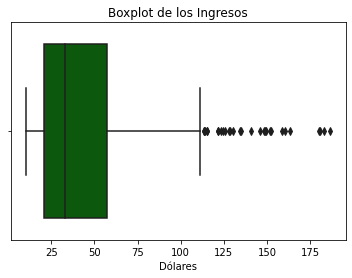

In [ ]:
sns.boxplot(x=ingresos,color = "darkgreen") 
plt.title("Boxplot de los Ingresos")
plt.xlabel("Dólares")
plt.show()

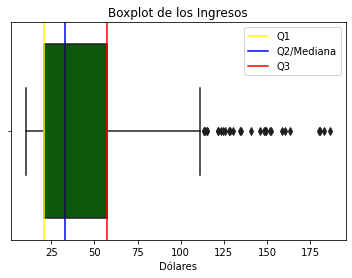

In [ ]:
sns.boxplot(x=ingresos, color="darkgreen", whis=1.5) 
plt.title("Boxplot de los Ingresos")
plt.xlabel("Dólares")
plt.axvline(ingresos.quantile(0.25), color='yellow', label='Q1')
plt.axvline(mediana, color='blue', label='Q2/Mediana')
plt.axvline(ingresos.quantile(0.75), color='red', label='Q3')
plt.legend()
plt.show()

No handles with labels found to put in legend.


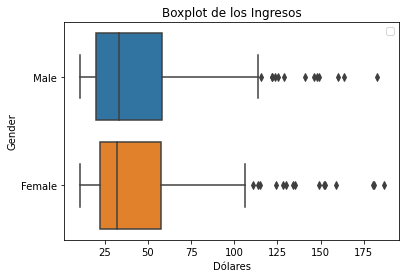

In [ ]:
sns.boxplot(x=ingresos, y=Credit["Gender"], whis=1.5) 
plt.title("Boxplot de los Ingresos")
plt.xlabel("Dólares")
plt.legend()
plt.show()

No handles with labels found to put in legend.


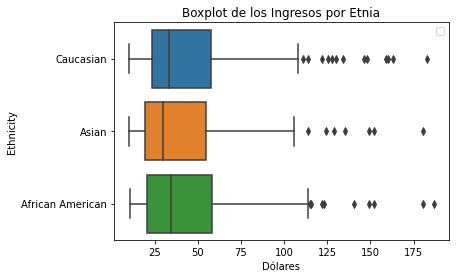

In [ ]:
sns.boxplot(x=ingresos, y=Credit["Ethnicity"]) 
plt.title("Boxplot de los Ingresos por Etnia")
plt.xlabel("Dólares")
plt.legend()
plt.show()

### Valores atípicos/extremos
Se definen como observaciones extremas a aquellas que se encuentran fuera del rango $$[Q_1-(1.5 \times IQR) ; Q_3 +(1.5 \times IQR)]$$

In [ ]:
IQR  = stats.iqr(ingresos)
whis = 1.5
cons = IQR * whis

#Cuartiles
Q1   = ingresos.quantile(0.25)
Q3   = ingresos.quantile(0.75)

print("El límite inferior para valores extremos es:", (Q1-cons))
print("El límite superior para valores extremos es:", (Q3+cons))

El límite inferior para valores extremos es: -33.687999999999995
El límite superior para valores extremos es: 112.166


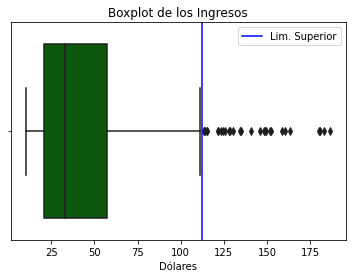

In [ ]:
sns.boxplot(x=ingresos, color="darkgreen", whis=1.5) 
plt.title("Boxplot de los Ingresos")
plt.xlabel("Dólares")
plt.axvline(Q3+cons, color='blue', label='Lim. Superior')
plt.legend()
plt.show()

>**Ejercicio 3:** Encuentre los quintiles y el rango intercuartil de la columna `Education` del  DataFrame `Credit`

In [ ]:
#Su código aquí


### Solución

In [ ]:
print('Respuesta:')
educacion = Credit['Education']
print('Quintiles:', educacion.quantile(np.arange(0.2, 1, 0.2)))
print('\nIQR Educación:', stats.iqr(educacion))

Respuesta:
Quintiles: 0.2    11.0
0.4    13.0
0.6    15.0
0.8    16.0
Name: Education, dtype: float64

IQR Educación: 5.0


## 5. Medidas de Forma
Interprete el coeficiente de asimetría y la curtosis

In [ ]:
print("El coeficiente de asimetría es igual a:", ingresos.skew())
print("La curtosis es igual a:", ingresos.kurtosis())

El coeficiente de asimetría es igual a: 1.742117404958152
La curtosis es igual a: 2.947476431306625


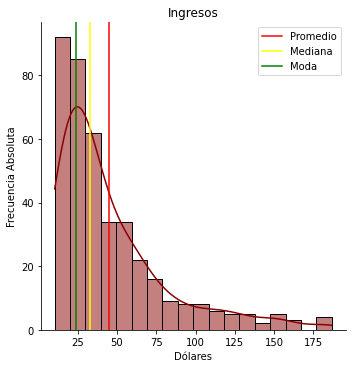

In [ ]:
sns.displot(ingresos, color="darkred", kde=True)
plt.title("Ingresos")
plt.xlabel("Dólares")
plt.ylabel("Frecuencia Absoluta")
plt.axvline(media, color='red', label='Promedio')
plt.axvline(mediana, color='yellow', label='Mediana')
plt.axvline(moda[0], color='green', label='Moda')
plt.legend()
plt.show()

>**Ejercicio 4:** Obtenga el coeficiente de asimetría y la curtosis de la columna `Rating` del  DataFrame `Credit`

In [ ]:
# Su código aquí


### Solución

In [ ]:
print('Respuesta:')
puntaje = Credit['Rating']
print('Coeficiente de asimetría:', puntaje.skew())
print('Curtosis:', puntaje.kurtosis())

Respuesta:
Coeficiente de asimetría: 0.8653935227370102
Curtosis: 1.0609469816702823


## 6. Distribución Normal

In [ ]:
data = np.random.normal(0, 1, 50000)

print("mean : ", np.mean(data))
print("var  : ", np.var(data))
print("skew : ",stats.skew(data))
print("kurt : ",stats.kurtosis(data))

mean :  -0.001784404744844449
var  :  0.9977197866320777
skew :  -0.0016445000080465128
kurt :  0.0065899786305605446


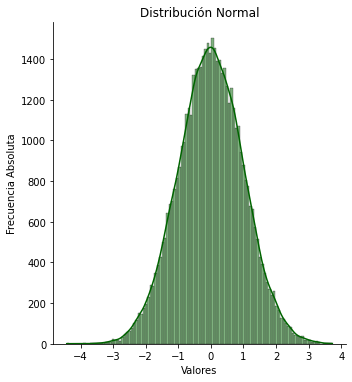

In [ ]:
sns.displot(data, color="darkgreen", kde=True)
plt.title("Distribución Normal")
plt.xlabel("Valores")
plt.ylabel("Frecuencia Absoluta")
plt.show()

## 7. Covarianza y correlación

Analizar las relaciones **lineales** entre dos variables cuantitativas por medio de la covarianza y correlación.

- **Covarianza**: Nos da el signo de la relación entre dos variables, pero no podemos determinar la intensidad en la relación entre las mismas
- **Coeficiente de correlación de Person**: Nos permite entender la relación entre las variables tanto su dirección (signo) e intensidad (valor). Se encuentra entre los valores de -1 y 1

In [ ]:
# Matriz de varianzas y covarianzas
Credit\
.cov()\
.round(decimals=2)

,Income,Limit,Rating,Cards,Age,Education,Balance
Income,1242.16,64437.01,4315.49,-0.88,106.60,-3.05,7513.03
Limit,64437.01,5327781.92,356019.74,32.38,4016.95,-169.87,914445.99
Rating,4315.49,356019.74,23939.56,11.30,275.34,-14.57,61434.67
Cards,-0.88,32.38,11.30,1.88,1.02,-0.22,54.51
Age,106.60,4016.95,275.34,1.02,297.56,0.20,14.55
Education,-3.05,-169.87,-14.57,-0.22,0.20,9.77,-11.58
Balance,7513.03,914445.99,61434.67,54.51,14.55,-11.58,211378.23


In [ ]:
# Matriz de correlaciones
Credit\
.corr()\
.round(decimals=2)

,Income,Limit,Rating,Cards,Age,Education,Balance
Income,1.00,0.79,0.79,-0.02,0.18,-0.03,0.46
Limit,0.79,1.00,1.00,0.01,0.10,-0.02,0.86
Rating,0.79,1.00,1.00,0.05,0.10,-0.03,0.86
Cards,-0.02,0.01,0.05,1.00,0.04,-0.05,0.09
Age,0.18,0.10,0.10,0.04,1.00,0.00,0.00
Education,-0.03,-0.02,-0.03,-0.05,0.00,1.00,-0.01
Balance,0.46,0.86,0.86,0.09,0.00,-0.01,1.00


**Nota Final**: Es importante comprender que la correlación no representa causalidad, analicemos algunos ejemplos: [Correlación Espuria](https://www.tylervigen.com/spurious-correlations)



<div style="text-align: center; line-height: 0; padding-top: 9px;">
  <img src="https://storage.googleapis.com/datasets-academy/public-img/notebooks/headers/databits-footer-notebook.png" alt="Databricks Learning" style="width: 100%;">
</div>